**Общая информация**

**Срок сдачи:** 21 октября 2020, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [2]:
from scipy.spatial import distance
from scipy import stats
from sklearn.neighbors import KDTree


class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute', metric='euclidean'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
        self.metric = metric
    
    def fit(self, X, y):
        if self.algorithm == 'brute':
            self.X = X
        elif self.algorithm == 'kd_tree':
            self.X = KDTree(X, leaf_size=40) 
        self.y = y        
    
    def predict(self, X):
        if self.algorithm == 'brute':
            k_best = np.argpartition(distance.cdist(X, self.X, metric=self.metric),
                                     self.n_neighbors, axis=1)[:, :self.n_neighbors]
            
        elif self.algorithm == 'kd_tree':
            k_best = self.X.query(X, self.n_neighbors, return_distance=False)
            
        k_best_classes = self.y[k_best]
        return stats.mode(k_best_classes, axis=1).mode.ravel()

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [3]:
iris = datasets.load_iris()

In [4]:
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [6]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [7]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [8]:
%time clf.fit(X_train, y_train)

CPU times: user 946 µs, sys: 0 ns, total: 946 µs
Wall time: 800 µs


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [9]:
%time my_clf.fit(X_train, y_train)

CPU times: user 7 µs, sys: 2 µs, total: 9 µs
Wall time: 10.7 µs


In [10]:
%time clf.predict(X_test)

CPU times: user 3.07 ms, sys: 13 µs, total: 3.09 ms
Wall time: 3.91 ms


array([1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2])

In [11]:
%time my_clf.predict(X_test)

CPU times: user 1.38 ms, sys: 0 ns, total: 1.38 ms
Wall time: 1.82 ms


array([1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [12]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [14]:
%time clf.fit(X_train, y_train)

CPU times: user 1.12 ms, sys: 0 ns, total: 1.12 ms
Wall time: 2.27 ms


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [15]:
%time my_clf.fit(X_train, y_train)

CPU times: user 183 µs, sys: 35 µs, total: 218 µs
Wall time: 225 µs


In [16]:
%time clf.predict(X_test)

CPU times: user 1.35 ms, sys: 1.07 ms, total: 2.42 ms
Wall time: 4.1 ms


array([2, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1])

In [17]:
%time my_clf.predict(X_test)

CPU times: user 1.47 ms, sys: 0 ns, total: 1.47 ms
Wall time: 2.54 ms


array([2, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1])

In [18]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [19]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [20]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1000)
X = vectorizer.fit_transform(data).toarray()
scaler = StandardScaler()
X = scaler.fit_transform(X)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [22]:
import sklearn
from sklearn.model_selection import KFold
from sklearn import metrics

In [23]:
# X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=(1/3), random_state=0)
kf = KFold(n_splits=3, random_state=None, shuffle=False)
X_train = []
X_test = []
y_train = []
y_test = []
for train_index, test_index in kf.split(X):
    X_train.append(X[train_index])
    X_test.append(X[test_index])
    y_train.append(target[train_index])
    y_test.append(target[test_index])

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [24]:
def best_n_neighbors(X, y, metric='euclidean'):
    scores = []
    for i in range(300, 401):
        my_clf = MyKNeighborsClassifier(i, algorithm='brute', metric=metric)
        scores.append(sklearn.model_selection.cross_val_score(my_clf,
                                                              X, y, cv=KFold(n_splits=3, shuffle=True),
                                                              scoring='accuracy', error_score=3).mean())
    plt.plot(np.arange(300, 401), scores)
    best_n = np.asarray(scores).argmax()
    return (best_n + 300, scores[best_n])

CPU times: user 2h 30min 1s, sys: 1.65 s, total: 2h 30min 3s
Wall time: 2h 30min 18s


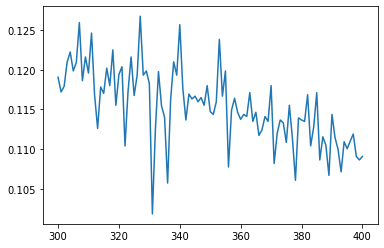

In [25]:
%%time

best_n_cos, best_score_cos = best_n_neighbors(X, target)

In [26]:
vectorizer = CountVectorizer(max_features=1000)
X = vectorizer.fit_transform(data).toarray()
scaler = StandardScaler()
X = scaler.fit_transform(X)

CPU times: user 2h 26min 48s, sys: 1.26 s, total: 2h 26min 49s
Wall time: 2h 27min 1s


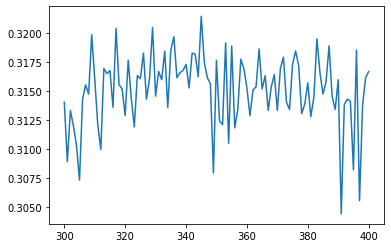

In [27]:
%%time

best_n_cos, best_score_cos = best_n_neighbors(X, target, metric='cosine')

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(data).toarray()
scaler = StandardScaler()
X = scaler.fit_transform(X)

CPU times: user 2h 26min 40s, sys: 1.43 s, total: 2h 26min 41s
Wall time: 2h 26min 57s


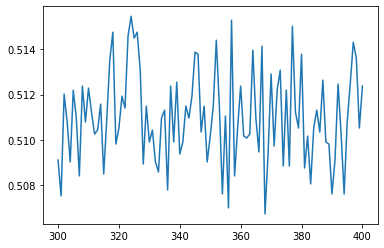

In [29]:
%%time

best_n_tfidf_1000, best_score_tfidf_1000 = best_n_neighbors(X, target, metric='cosine')

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

In [30]:
best_score_tfidf_1000

0.5154666564305987

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [31]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

In [32]:
test_data = newsgroups['data']
test_target = newsgroups['target']

In [33]:
X_test = vectorizer.transform(test_data).toarray()
X_test = scaler.transform(X_test)

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

Комментарий про результаты


Лучшей моделью стала tf-idf от 1000 координат с косинусной метрикой. Лучшим k для неё (если рассматривать от 1 до 10) -- 9.
Графики и вычисления для других моделей оставлены, чтобы были видны те числа, которые сравнивались.

После рассмотрения для бОльших k (из-за ответа в Slack про то, что 10 -- это очень мало, при проверке так и оказалось) я остановилась на интервале [300-400] для выбора k при кросс-валидации своих моделей, потому что дальше accuracy падает.

Ниже приводятся результаты тестирования для моего класса и для библиотечного. Качество на тестовой выборке может падать, потому что там, например, будут тексты с принципиально другим набором лексем, которые просто не попали в словарь, поэтому у документов будет больше нулей. Кроме того, может оказаться, что на самом деле классы как-то смещены относительно того, что было в обучающей выборке, или в обучающей выборке не было каких-то граничных точек, которые могли бы повлиять на спорные случаи.

Разница в скорости, вероятно, связана с тем, что библиотечная реализация оптимально хранит данные в памяти и использует чанки, т.е. меньше обращений к диску.


In [58]:
%%time
my_clf_best = MyKNeighborsClassifier(best_n_tfidf_1000, algorithm='brute', metric='cosine')
my_clf_best.fit(X, target)

CPU times: user 13 µs, sys: 0 ns, total: 13 µs
Wall time: 16 µs


In [59]:
%time my_clf_best_pred = my_clf_best.predict(X_test)

CPU times: user 1min 28s, sys: 56 ms, total: 1min 28s
Wall time: 1min 28s


In [60]:
accuracy_score(test_target, my_clf_best_pred)

0.46946362187997875

In [61]:
%%time
knn_clf = KNeighborsClassifier(best_n_tfidf_1000, algorithm='brute', metric='cosine')
knn_clf_best = knn_clf.fit(X, target)


CPU times: user 22.9 ms, sys: 2 ms, total: 24.9 ms
Wall time: 28.5 ms


In [62]:
%time knn_clf_pred = knn_clf.predict(X_test)

CPU times: user 12 s, sys: 119 ms, total: 12.1 s
Wall time: 7.15 s


In [63]:
accuracy_score(test_target, knn_clf_pred)

0.46946362187997875

In [64]:
assert (abs(accuracy_score(test_target, my_clf_best_pred) - accuracy_score(test_target, knn_clf_pred)) < 0.05)

In [ ]:
def best_neighbors(X, y, metric='euclidean'):
    scores = []
    for i in range(1, 1001):
        clf = KNeighborsClassifier(i, algorithm='brute', metric=metric)
        scores.append(sklearn.model_selection.cross_val_score(clf,
                                                              X, y, cv=KFold(n_splits=3, shuffle=True),
                                                              scoring='accuracy', error_score=3).mean())
    best_n = np.asarray(scores).argmax()
    plt.plot(np.arange(1, 1001), scores)
    return (best_n + 1, scores[best_n])

CPU times: user 3h 33min 37s, sys: 5min 49s, total: 3h 39min 27s
Wall time: 2h 12min 2s


(376, 0.5165288593842667)

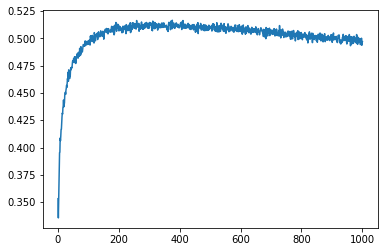

In [ ]:
%time best_neighbors(X, target, metric='cosine')

In [ ]:
def best_250_neighbors(X, y, metric='euclidean'):
    scores = []
    for i in range(200, 451):
        clf = KNeighborsClassifier(i, algorithm='brute', metric=metric)
        scores.append(sklearn.model_selection.cross_val_score(clf,
                                                              X, y, cv=KFold(n_splits=3, shuffle=True),
                                                              scoring='accuracy', error_score=3).mean())
    best_n = np.asarray(scores).argmax()
    plt.plot(np.arange(200, 451), scores)
    return (best_n + 1, scores[best_n])

CPU times: user 52min 27s, sys: 1min 29s, total: 53min 56s
Wall time: 32min 1s


(196, 0.518294979480527)

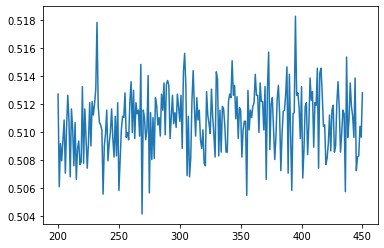

In [ ]:
%time best_250_neighbors(X, target, metric='cosine')